# Assignment 4 - Clustering

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [61]:
import pandas as pd

df= pd.read_csv("Country-data.csv");
print(df.head())
print(df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
(167, 10)


### Part 1A: 5 points
Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of any action, explain your decision for the action.

In [62]:
#Checking missing Values
print(df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


As there are no missing values in any of the column in the dataset, we can use the data set as it is without modifying or replacing any data

### Part 1B: 10 points

Drop necessary columns that won't be used for clustering and Scale the data for further processing. Display the processed data. Explain your actions.

In [63]:
from sklearn.preprocessing import StandardScaler as standard_scaler

#Dropping country column
df_clustering = df.drop(columns=['country'])

#Scaling the data
standardScaler=standard_scaler()
scaled_data = standardScaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(scaled_data, columns=df_clustering.columns)

print(df_scaled)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3  

# Explain your actions
Dropping country column as it contains unique value and is a non numeric column. This wont be useful for clustering.
As clustering utilizes distance measures to group similar data points together.
To ensure all features contribute equally to the clustering process, data is scaled to
have a mean of 0 and a standard deviation of 1 for all features


References:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### Part 1C: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 2 to 12 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters).

Explain from the graph which is the most appropriate value for k.

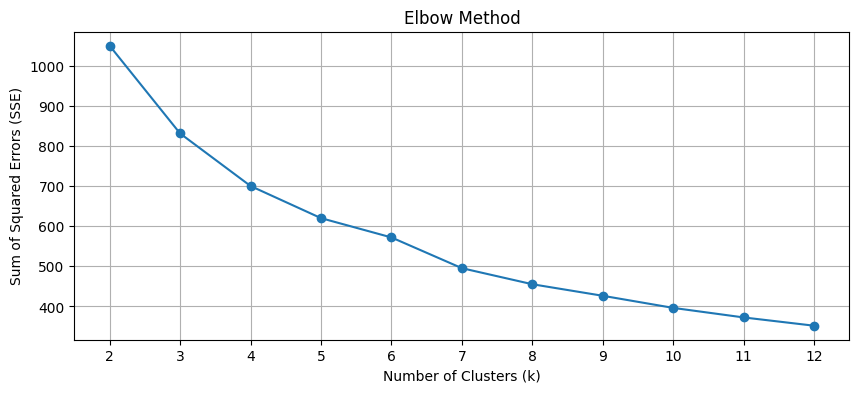

Sum of Squared Errors are as follows:
[1050.2145582853307, 831.4244352086876, 700.3229986404376, 620.1633712888422, 571.9992966496744, 495.3233825951919, 455.27682760469986, 426.4584456471473, 396.25069895343006, 372.45225976576603, 351.80672738520536]


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as km

# Calculating sum of squared errors for every k ranging from 2 to 12.
sum_of_squared_errors_values = []
for k in range(2, 13):
    kmeans = km(n_clusters=k, random_state=42, n_init=10) #Here n_init is number of times the KMeans algorithm will be run with different centroid seeds and n_initi=10 is added as a parameter in order to avoid FutureWarning
    kmeans.fit(df_scaled)
    sum_of_squared_errors_values.append(kmeans.inertia_)

# Plotting line chart for SSE values against k
plt.figure(figsize=(10, 4))
plt.plot(range(2, 13), sum_of_squared_errors_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.xticks(np.arange(2, 13, 1))
plt.grid(True)
plt.show()

print("Sum of Squared Errors are as follows:")
print(sum_of_squared_errors_values)

# Interpret the results

Number of Optimal Clusters=4 as if we can see the below point k=4 is the elbow point, from k=4 onwards SSE is reducing at a slower rate

References:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://matplotlib.org/stable/tutorials/introductory/pyplot.html

### Part 1D: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2-12). Explain which K value you selected from the results and why?

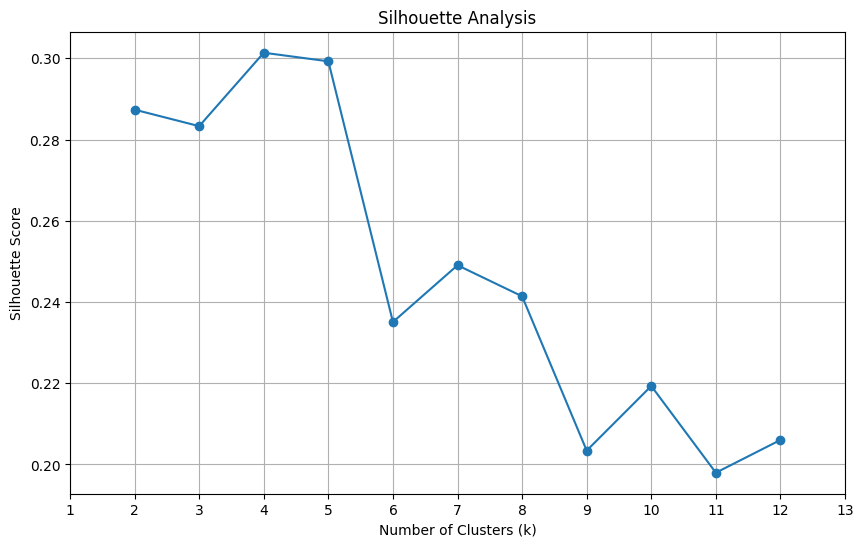

Silhouette Scores are as follows:
[0.28735668921406704, 0.28329575683463126, 0.301375962376881, 0.2992594995920442, 0.2350698927516289, 0.24905003461730515, 0.2414024552159115, 0.20340692932613638, 0.21931388763003506, 0.1979613096161359, 0.20602646495525875]


In [67]:
from sklearn.metrics import silhouette_score as silhouetteScore
silhouette_scores = []

# Calculating silhouette_scores for each value of k ranging from 2 to 12.
for k in range(2, 13):
    kmeans = km(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouetteScore(df_scaled, labels))

# Plotting silhouette scores against k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(np.arange(1, 14, 1))
plt.grid(True)
plt.show()

print("Silhouette Scores are as follows:")
print(silhouette_scores)

# Interpret!

From the plot, we can observe that silhouette score at k=4 is highest.Hence we selected k=4 to be optimal value and at k=4 data points could be clustered into four distinct and well-defined clusters

References:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://matplotlib.org/stable/tutorials/introductory/pyplot.html


### Part 1E: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [69]:
best_k_value = 4

# Applying k-means algorithm with the best k value
kmeans = km(n_clusters=best_k_value, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Adding cluster labels as new column to the original dataframe
df_clustered = df.copy()
df_clustered['Cluster_Labels'] = kmeans.labels_

print(df_clustered)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Cluster_Labels  
0         9.44        56.2       5.82    553    

Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Part 1F: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [70]:
# Calculating mean for each column within each cluster
df_clustered_numeric =df_clustered.select_dtypes(include=np.number)
cluster_means_avg = df_clustered_numeric.groupby('Cluster_Labels').mean()
print(cluster_means_avg)

                child_mort     exports    health     imports        income  \
Cluster_Labels                                                               
0                21.389655   41.290678  6.235862   48.038689  12968.620690   
1                92.961702   29.151277  6.388511   42.323404   3942.404255   
2                 4.953333   45.826667  9.168667   39.736667  45250.000000   
3                 4.133333  176.000000  6.793333  156.666667  64033.333333   

                inflation  life_expec  total_fer          gdpp  
Cluster_Labels                                                  
0                7.413460   72.935632   2.286552   6919.103448  
1               12.019681   59.187234   5.008085   1922.382979  
2                2.742200   80.376667   1.795333  43333.333333  
3                2.468000   81.433333   1.380000  57566.666667  


# Interpret your results

The clustering seems to have divided the countries into four distinct groups based on their socio-economic indicators.


Cluster 0: This cluster represents countries with relatively low child mortality rates, moderate levels of exports, imports, and income. These countries also have moderate healthcare expenditure and life expectancy, suggesting a middle-income group.
Cluster 1: This cluster represents countries with high child mortality rates, low income, high inflation, and high fertility rates. These countries are likely to be economically underdeveloped.
Cluster 2: This cluster represents countries with high income, high healthcare expenditure, high life expectancy, and low fertility rates. These countries are likely to be economically developed with good healthcare systems and overall well-being.
Cluster 3: This cluster represents countries with high exports, imports, income, and GDP per capita. These countries are likely to be economically strong and developed.

### Part 1G: 5 points

Display top 5 countries within each group/cluster. If there aren't enough countries within that cluster, just display that many.

In [72]:
for cluster_label in range(best_k_value):
    cluster_df = df_clustered[df_clustered['Cluster_Labels'] == cluster_label]
    top_countries = cluster_df.nlargest(5, ['gdpp', 'income', 'health'])
    print(f"\nCluster {cluster_label + 1} - Top 5 Countries:")
    print(top_countries.country)


Cluster 1 - Top 5 Countries:
10            Bahamas
11            Bahrain
43     Czech Republic
128      Saudi Arabia
115              Oman
Name: country, dtype: object

Cluster 2 - Top 5 Countries:
49     Equatorial Guinea
55                 Gabon
137         South Africa
21              Botswana
108              Namibia
Name: country, dtype: object

Cluster 3 - Top 5 Countries:
114         Norway
145    Switzerland
123          Qatar
44         Denmark
144         Sweden
Name: country, dtype: object

Cluster 4 - Top 5 Countries:
91     Luxembourg
133     Singapore
98          Malta
Name: country, dtype: object


### Part 1H: 5 points

Plot health vs life-expec and shade each point belonging to it's respective cluster.

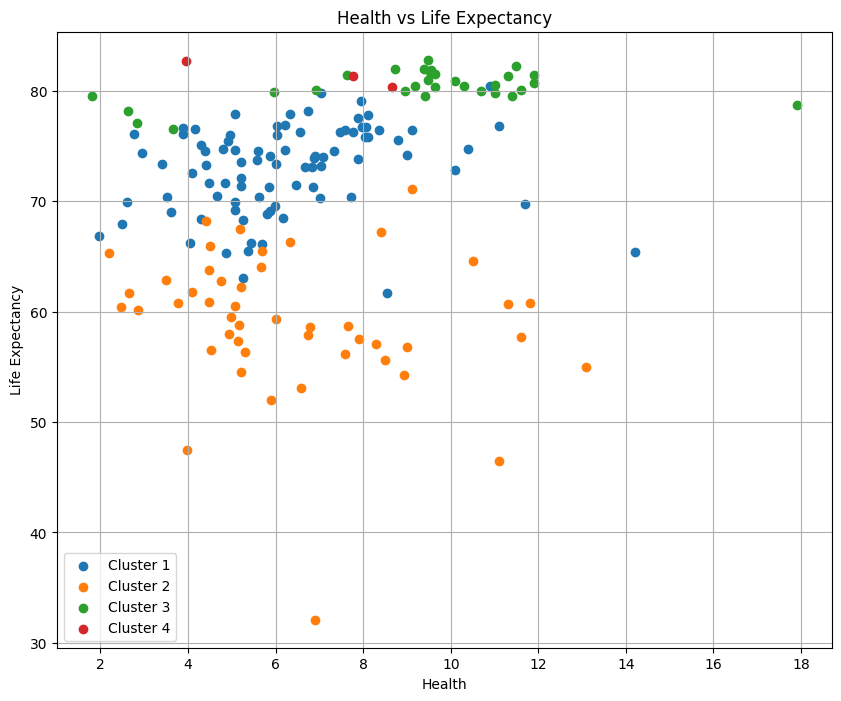

In [73]:
# Plotting ScatterPlot for "Health" vs "Life Expectancy" with points shaded by cluster
plt.figure(figsize=(10, 8))
for cluster_label in range(best_k_value):
    cluster_df = df_clustered[df_clustered['Cluster_Labels'] == cluster_label]
    plt.scatter(cluster_df['health'], cluster_df['life_expec'], label=f'Cluster {cluster_label + 1}')
plt.xlabel('Health')
plt.ylabel('Life Expectancy')
plt.title('Health vs Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

Reference: https://realpython.com/visualizing-python-plt-scatter/

## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

coordinates_data=pd.read_csv("co-ordinates.csv")
print(coordinates_data.head())
print(coordinates_data.shape)

           X         Y
0 -10.288860 -3.480595
1 -11.025979 -4.267757
2  -9.242627 -3.115357
3   9.572838 -0.395079
4  -6.625216 -8.221243
(200, 2)


### Part 2A: 5 points

Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

Reference : https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp

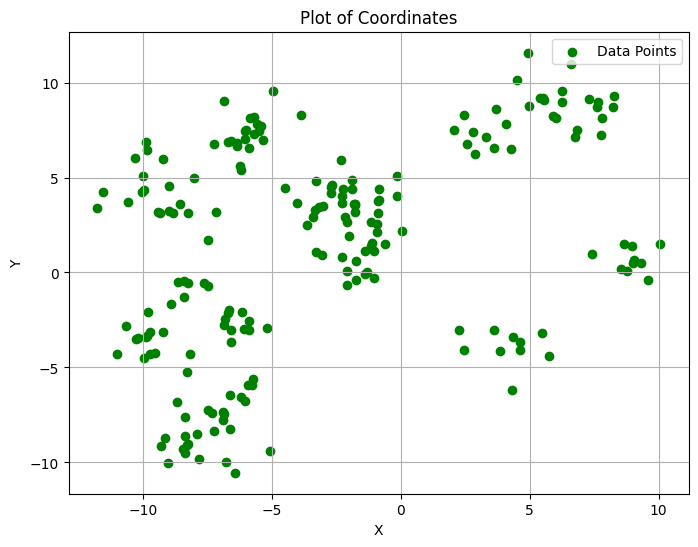

In [75]:
coordinates_data_x=coordinates_data['X']
coordinates_data_y=coordinates_data['Y']

#Plotting the co-ordinates
plt.figure(figsize=(8, 6))
plt.scatter(coordinates_data_x, coordinates_data_y, c='green', marker='o', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Coordinates')
plt.legend()
plt.grid(True)
plt.show()

# guess the possible clusters. Explain your guess

As per the guess, there are seven possible clusters

Cluster 1: X:   -10 -5            Y:  -10 -5
Cluster 2: X:   -10 -5            Y:   -5  0
Cluster 3: X:   -10 -5            Y:    0 10
Cluster 4: X:   -5   0            Y:    0  5
Cluster 5: X:    0   5            Y:   -5  0
Cluster 6: X:    6   10           Y:    0  5
Cluster 7: X:    0   10           Y:    5  10


### Part 2B: 15 points

Using Hierarchical clustering with euclidean + ward and manhattan + average, display the results for clusters 4,5,6 and 7. Add tittle for each plot.

From the results, what according to you should be the appropriate value of K and for which pair of affinity and linkage? Interpret your results. Did this match with your previous guess?

References:
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

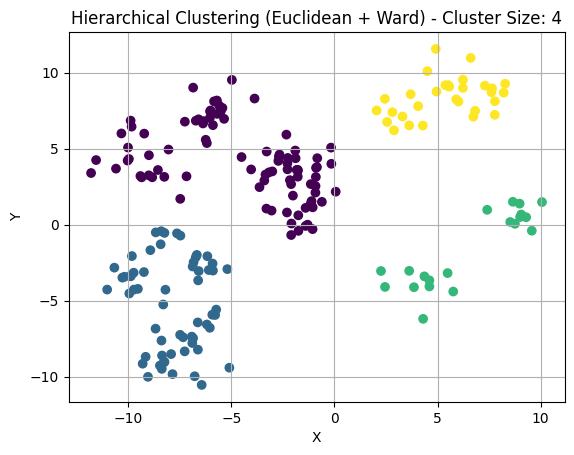

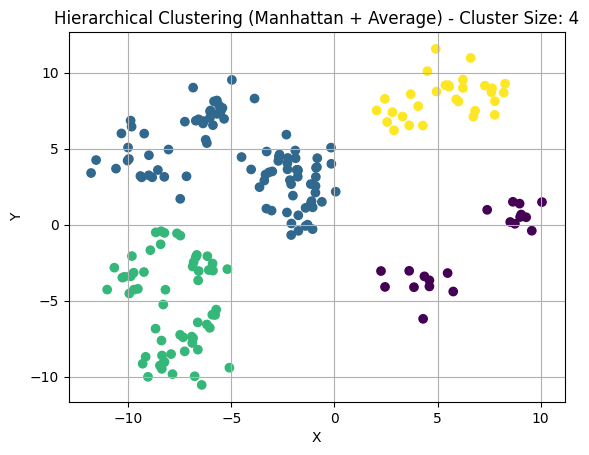

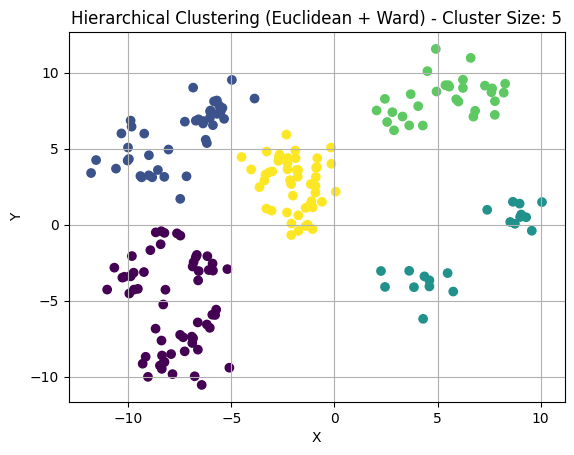

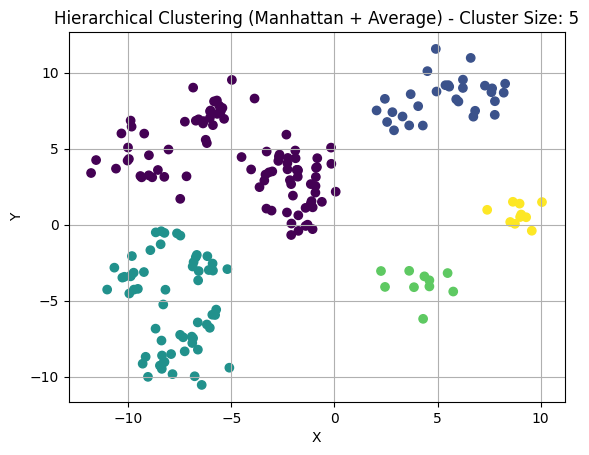

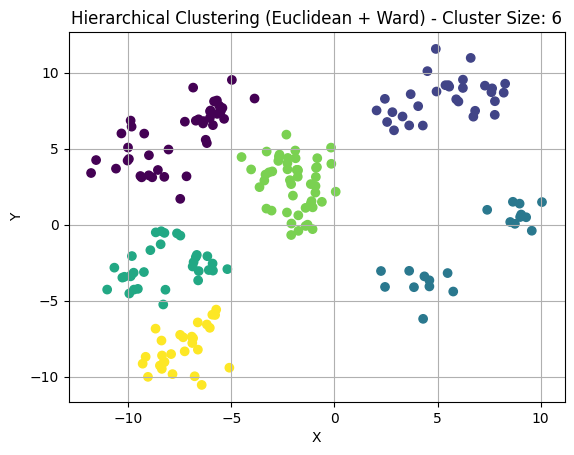

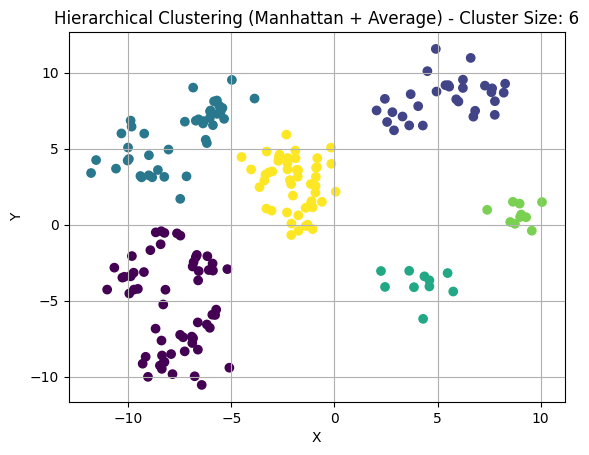

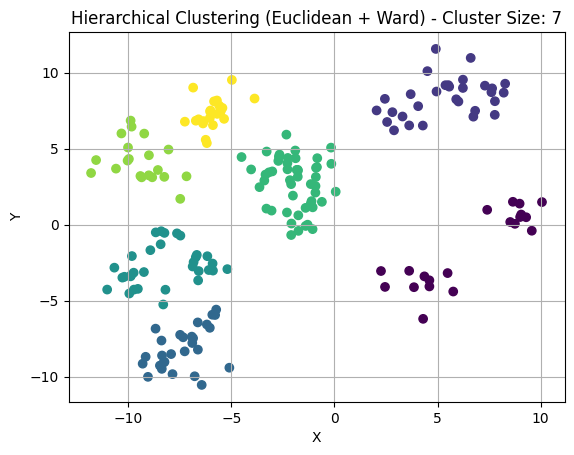

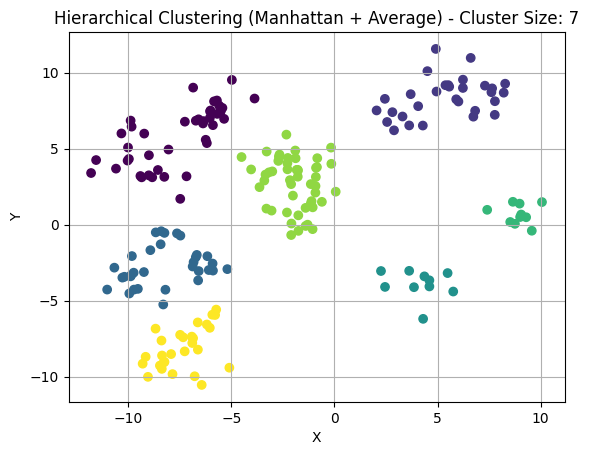

In [76]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

cluster_sizes = [4, 5, 6, 7]

# Hierarchical clustering with Euclidean distance and Ward linkage
def hierarchical_euclidean_ward(cluster_size):
    #AgglomerativeClustering with cluster size, Euclidean distance metric, and Ward linkage
    model = AgglomerativeClustering(n_clusters=cluster_size, metric='euclidean', linkage='ward')
    model.fit(coordinates_data)
    return model.labels_

# Hierarchical clustering with Manhattan distance and Average linkage
def hierarchical_manhattan_average(cluster_size):
    # AgglomerativeClustering with cluster size, Manhattan distance metric, and Average linkage
    model = AgglomerativeClustering(n_clusters=cluster_size, metric='manhattan', linkage='average')
    model.fit(coordinates_data)
    return model.labels_

# Plotting the clustering results for each cluster size
for c_size in cluster_sizes:
    # Euclidean + Ward clustering
    labels_euclidean_ward = hierarchical_euclidean_ward(c_size)
    plt.scatter(coordinates_data_x, coordinates_data_y, c=labels_euclidean_ward, marker='o')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Hierarchical Clustering (Euclidean + Ward) - Cluster Size: {c_size}')
    plt.grid(True)
    plt.show()

    # Manhattan + Average clustering
    labels_manhattan_average = hierarchical_manhattan_average(c_size)
    plt.scatter(coordinates_data_x, coordinates_data_y, c=labels_manhattan_average, marker='o')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Hierarchical Clustering (Manhattan + Average) - Cluster Size: {c_size}')
    plt.grid(True)
    plt.show()


# interpret your results. Explain your selection

As seen previously, k = 7 and manhattan + average yields appropriate clusters.

Each cluster is evenly spaced, and each data point is collected in the correct cluster.

The Manhattan distance is a distance measurement that uses a grid-like technique to determine the gap between two places.
It computes the total difference in absolute values between two points' coordinates.
The Euclidean distance is more susceptible to outliers than the Manhattan distance.

In average linkage, the two clusters with the shortest average distance are combined, rather than averaging out the distances between all pairs of points in different clusters. This method produces long, thin clusters that are more resistant to outliers. It works effectively with data that has a linear shape.

For data with a linear shape, the average linkage strategy and the Manhattan distance metric may perform better.





### Part 2C: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

Reference : https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

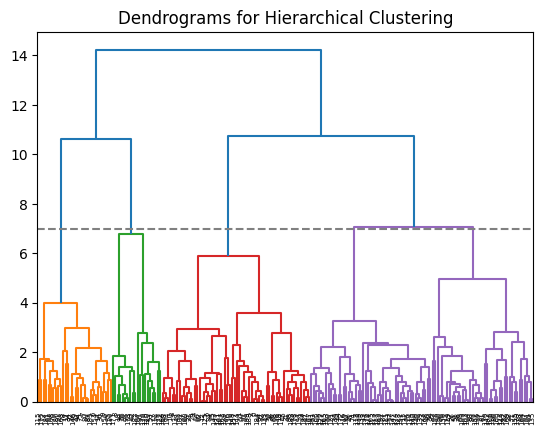

In [77]:
import scipy.cluster.hierarchy as shc
plt.title("Dendrograms for Hierarchical Clustering")

# Hierarchical clustering and obtain linkage matrix using the 'average' method
clusters = shc.linkage(coordinates_data, method='average')
# Plotting dendrogram using the linkage matrix
shc.dendrogram(Z=clusters)
k = 7
plt.axhline(y=k, c='grey', linestyle='dashed')
plt.show()

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code.
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

## Submission details

Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

## NOTE: Only one team member will submit the file.